In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [5]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [6]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [7]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

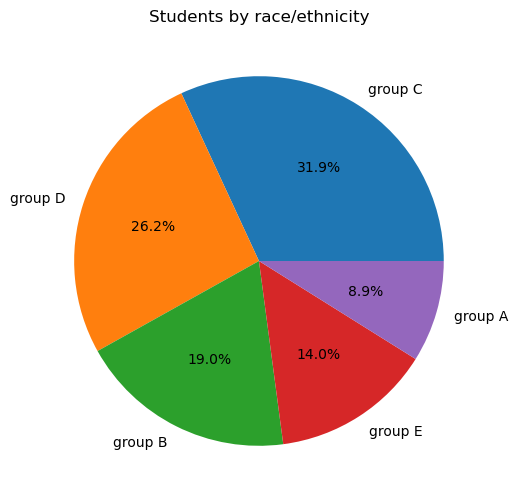

In [8]:
labels = data['race/ethnicity'].value_counts().index

plt.figure(figsize=(10, 6))
plt.pie(data['race/ethnicity'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.title('Students by race/ethnicity')
plt.savefig('images/race-ethnicity-plot.png')

plt.show()

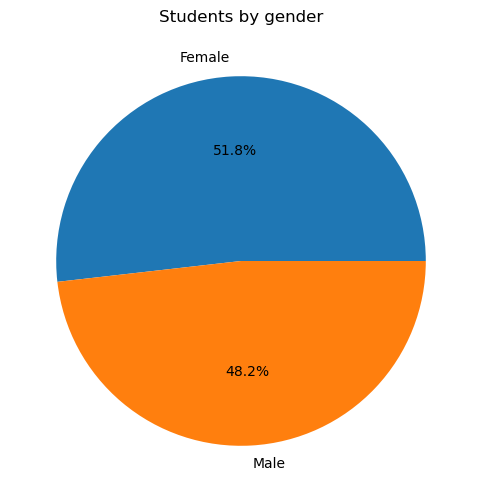

In [9]:
plt.figure(figsize=(10, 6))
plt.pie(data['gender'].value_counts(), autopct='%1.1f%%', labels=['Female', 'Male'])
plt.title('Students by gender')
plt.savefig('images/gender-plot.png')

plt.show()

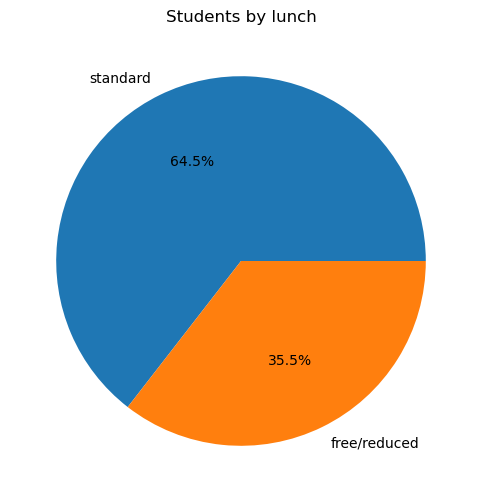

In [10]:
labels = data['lunch'].value_counts().index

plt.figure(figsize=(10, 6))
plt.pie(data['lunch'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.title('Students by lunch')
plt.savefig('images/lunch-plot.png')

plt.show()

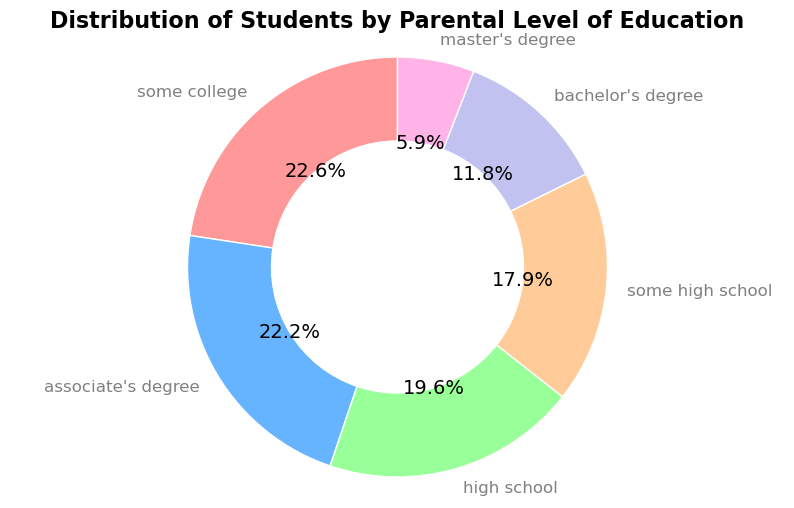

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('white')

# Define colors for each category
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Plot the pie chart with shadow and custom colors
wedges, texts, autotexts = ax.pie(data['parental level of education'].value_counts(), autopct='%1.1f%%', labels=data['parental level of education'].value_counts().index, colors=colors, startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Customize the text properties
for text, autotext in zip(texts, autotexts):
    text.set_color('grey')
    text.set_fontsize(12)
    autotext.set_color('black')
    autotext.set_fontsize(14)

# Set equal aspect ratio and remove axis labels
ax.axis('equal')
ax.set_title('Distribution of Students by Parental Level of Education', fontsize=16, fontweight='bold')

plt.savefig('images/education.png')

# Show the plot
plt.show()

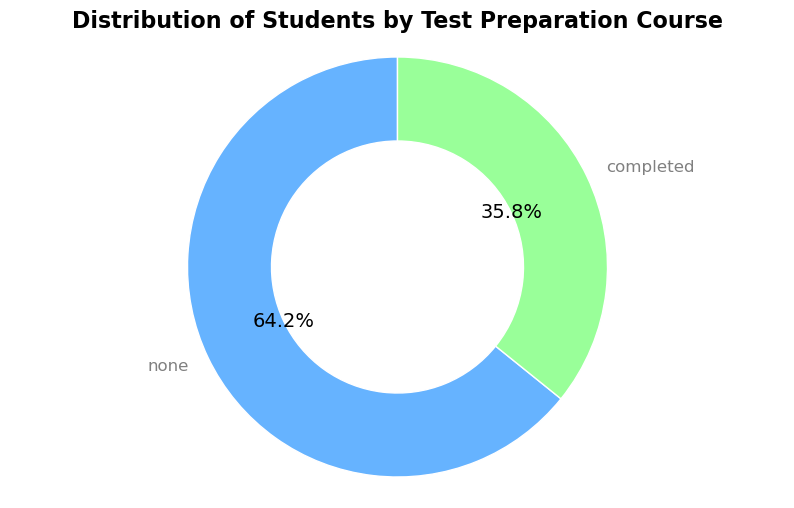

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('white')

# Define colors for each category
colors = ['#66b3ff', '#99ff99']

# Plot the pie chart with shadow and custom colors
wedges, texts, autotexts = ax.pie(data['test preparation course'].value_counts(), autopct='%1.1f%%', labels=data['test preparation course'].value_counts().index, colors=colors, startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Customize the text properties
for text, autotext in zip(texts, autotexts):
    text.set_color('grey')
    text.set_fontsize(12)
    autotext.set_color('black')
    autotext.set_fontsize(14)

# Set equal aspect ratio and remove axis labels
ax.axis('equal')
ax.set_title('Distribution of Students by Test Preparation Course', fontsize=16, fontweight='bold')

plt.savefig('images/preparation-plot.png')

# Show the plot
plt.show()

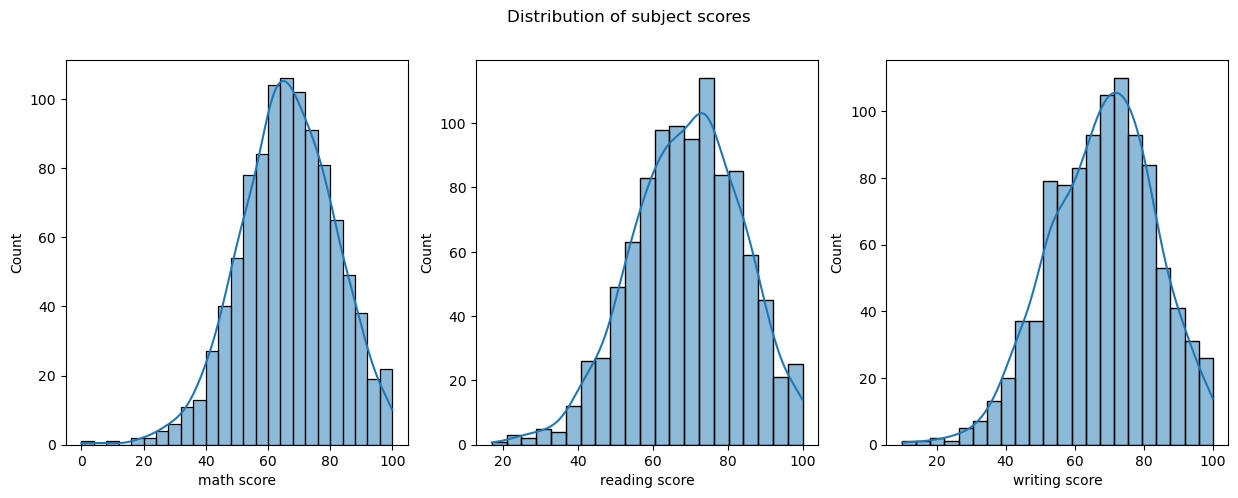

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(data.select_dtypes(include=['number'])):
    if i != 3:
        sns.histplot(data=data[col], ax=ax[i], kde=True)

plt.suptitle('Distribution of subject scores')

plt.savefig('images/grade-distribution.png')

plt.show()

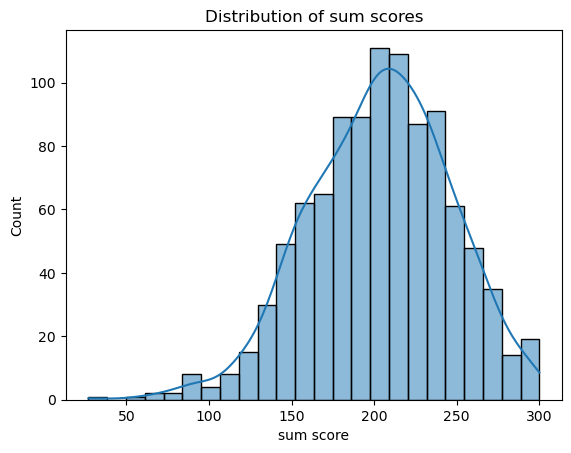

In [14]:
data['sum score'] = data[['math score', 'reading score', 'writing score']].sum(axis=1)

sns.histplot(data['sum score'], kde=True)

plt.title('Distribution of sum scores')

plt.savefig('images/total-grade.png')

plt.show()

In [15]:
sum_data = data.describe().loc['mean']
sum_completed = data[data['test preparation course'] == 'completed'].describe().loc['mean']
sum_none = data[data['test preparation course'] == 'none'].describe().loc['mean']

mean_values_prep = pd.DataFrame({
    'Total' : sum_data,
    'Prep Course: completed': sum_completed,
    'Prep Course: none': sum_none
})

In [16]:
mean_values_prep

,Total,Prep Course: completed,Prep Course: none
math score,66.089,69.695531,64.077882
reading score,69.169,73.893855,66.534268
writing score,68.054,74.418994,64.504673
sum score,203.312,218.008380,195.116822


In [17]:
sum_some_high = data[data['parental level of education'] == 'some high school'].describe().loc['mean']
sum_high = data[data['parental level of education'] == 'high school'].describe().loc['mean']
sum_some_college = data[data['parental level of education'] == 'some college'].describe().loc['mean']
sum_associate = data[data['parental level of education'] == "associate's degree"].describe().loc['mean']
sum_bachelors = data[data['parental level of education'] == "bachelor's degree"].describe().loc['mean']
sum_masters = data[data['parental level of education'] == "master's degree"].describe().loc['mean']

mean_values_education = pd.DataFrame({
    'Total' : sum_data,
    'Some High School': sum_some_high,
    'High School': sum_high,
    'Some College': sum_some_college,
    "Associate's Degree": sum_associate,
    "Bachelor's Degree": sum_bachelors,
    "Master's Degree": sum_masters,
})

In [18]:
mean_values_education

,Total,Some High School,High School,Some College,Associate's Degree,Bachelor's Degree,Master's Degree
math score,66.089,63.497207,62.137755,67.128319,67.882883,69.389831,69.745763
reading score,69.169,66.938547,64.704082,69.460177,70.927928,73.000000,75.372881
writing score,68.054,64.888268,62.448980,68.840708,69.896396,73.381356,75.677966
sum score,203.312,195.324022,189.290816,205.429204,208.707207,215.771186,220.796610


In [19]:
sum_standard = data[data['lunch'] == 'standard'].describe().loc['mean']
sum_free = data[data['lunch'] == 'free/reduced'].describe().loc['mean']

mean_values_lunch = pd.DataFrame({
    'Total' : sum_data,
    'Lunch: standard': sum_standard,
    'Lunch: free/reduced': sum_free
})

In [20]:
mean_values_lunch

,Total,Lunch: standard,Lunch: free/reduced
math score,66.089,70.034109,58.921127
reading score,69.169,71.654264,64.653521
writing score,68.054,70.823256,63.022535
sum score,203.312,212.511628,186.597183


In [21]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [22]:
data_encoded = data.iloc[:, :5].apply(lambda x: pd.Categorical(x).codes)
data_encoded[['math score', 'reading score', 'writing score', 'sum score']] = data.iloc[:, 5:]
data_encoded.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum score
0,0,1,1,1,1,72,72,74,218
1,0,2,4,1,0,69,90,88,247
2,0,1,3,1,1,90,95,93,278
3,1,0,0,0,1,47,57,44,148
4,1,2,4,1,1,76,78,75,229
5,0,1,0,1,1,71,83,78,232
6,0,1,4,1,0,88,95,92,275
7,1,1,4,0,1,40,43,39,122
8,1,3,2,0,0,64,64,67,195
9,0,1,2,0,1,38,60,50,148


In [23]:
unique_gender = np.unique(data_encoded['gender'])
unique_education = np.unique(data_encoded['parental level of education'])
unique_test_prep = np.unique(data_encoded['test preparation course'])
unique_lunch = np.unique(data_encoded['lunch'])
unique_race = np.unique(data_encoded['race/ethnicity'])

np.save('np_files/gender.npy', unique_gender)
np.save('np_files/education.npy', unique_education)
np.save('np_files/test_prep.npy', unique_test_prep)
np.save('np_files/lunch.npy', unique_lunch)
np.save('np_files/race.npy', unique_race)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [25]:
data_shuffled = data_encoded.sample(frac=1, random_state=42)

X = data_shuffled[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y1 = data_shuffled['math score']
y2 = data_shuffled['writing score']
y3 = data_shuffled['reading score']
y = data_shuffled['sum score']

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)
with open('scalers/scaler1.pkl', 'wb') as file:
    pickle.dump(scaler1, file)

model_math = LinearRegression()

model_math.fit(X1_train_scaled, y1_train)

y1_pred = model_math.predict(X1_test_scaled)

mse_1 = mean_squared_error(y1_test, y1_pred)
rmse_1 = np.sqrt(mse_1)
r2_1 = r2_score(y1_test, y1_pred)

print(f'Root Mean Squared Error: {rmse_1}')
print(f'R-squared: {r2_1}')

coefs1 = model_math.coef_
intercepts1 = model_math.intercept_

print(f'Coefficients: {coefs1}')
print(f'Intercep: {intercepts1}')

Root Mean Squared Error: 13.284456958543233
R-squared: 0.23217535729636363
Coefficients: [ 2.21570017  2.94776099 -1.18547306  5.18457848 -2.69380588]
Intercep: 66.175


In [27]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)
with open('scalers/scaler2.pkl', 'wb') as file:
    pickle.dump(scaler2, file)

model_writing = LinearRegression()

model_writing.fit(X2_train_scaled, y2_train)

y2_pred = model_writing.predict(X2_test_scaled)

mse_2 = mean_squared_error(y2_test, y2_pred)
rmse_2 = np.sqrt(mse_2)
r2_2 = r2_score(y2_test, y2_pred)

print(f'Root Mean Squared Error: {rmse_2}')
print(f'R-squared: {r2_2}')

coefs2 = model_writing.coef_
intercepts2 = model_writing.intercept_

print(f'Coefficients: {coefs2}')
print(f'Intercep: {intercepts2}')

Root Mean Squared Error: 12.72722807592315
R-squared: 0.25536866720099105
Coefficients: [-4.76817436  2.1798332  -1.48123469  3.9256354  -4.94670601]
Intercep: 67.9225


In [28]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)
with open('scalers/scaler3.pkl', 'wb') as file:
    pickle.dump(scaler3, file)

model_reading = LinearRegression()

model_reading.fit(X3_train_scaled, y3_train)

y3_pred = model_reading.predict(X3_test_scaled)

mse_3 = mean_squared_error(y3_test, y3_pred)
rmse_3 = np.sqrt(mse_3)
r2_3 = r2_score(y3_test, y3_pred)

print(f'Root Mean Squared Error: {rmse_3}')
print(f'R-squared: {r2_3}')

coefs3 = model_reading.coef_
intercepts3 = model_reading.intercept_

print(f'Coefficients: {coefs3}')
print(f'Intercep: {intercepts3}')

Root Mean Squared Error: 13.2027390688787
R-squared: 0.17124120717376734
Coefficients: [-3.83487599  1.80252637 -1.2093201   3.46236415 -3.60822799]
Intercep: 69.08


In [29]:
coefs1 = np.append(coefs1, intercepts1)
coefs2 = np.append(coefs2, intercepts2)
coefs3 = np.append(coefs3, intercepts3)

In [30]:
coefs = np.array([coefs1, coefs2, coefs3])
coefs

array([[ 2.21570017,  2.94776099, -1.18547306,  5.18457848, -2.69380588,
        66.175     ],
       [-4.76817436,  2.1798332 , -1.48123469,  3.9256354 , -4.94670601,
        67.9225    ],
       [-3.83487599,  1.80252637, -1.2093201 ,  3.46236415, -3.60822799,
        69.08      ]])

In [31]:
np.save('np_files/coefs.npy', coefs)